In [35]:
# Steps in Data Preprocessing

# 1. Data Collection: Gathering raw data from various sources.
# Task 1: Collect data from two different sources and merge them.
# Task 2: Validate the integrity of the collected datasets.
# Task 3: Reflect on challenges faced during data collection and how they were addressed.




In [36]:
import pandas as pd

# Task 1: Collect data from two different sources and merge them

# Simulate data collection from Source A: a CSV-like dataset
data_source_a = pd.DataFrame({
    'ID': [1, 2, 3, 4],
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'DateOfBirth': ['1990-01-01', '1985-05-12', '1992-07-19', '1988-11-30'],
    'Score_A': [85, 90, 78, 88]
})

# Simulate data collection from Source B: another CSV-like dataset with overlapping data
data_source_b = pd.DataFrame({
    'ID': [3, 4, 5, 6],
    'Name': ['Charlie', 'David', 'Eve', 'Frank'],
    'DateOfBirth': ['1992-07-19', '1988-11-30', '1991-09-15', '1983-02-28'],
    'Score_B': [82, 91, 75, 89]
})

print("Source A Data:")
print(data_source_a)
print("\nSource B Data:")
print(data_source_b)

# Merge datasets on 'ID' with an outer join to include all records
merged_data = pd.merge(data_source_a, data_source_b, on=['ID', 'Name', 'DateOfBirth'], how='outer')

print("\nMerged Data:")
print(merged_data)

# Task 2: Validate the integrity of the collected datasets

# Check for missing values
missing_values = merged_data.isnull().sum()
print("\nMissing values in merged data:")
print(missing_values)

# Handle missing values (example: fill missing scores with average or 0)
merged_data['Score_A'] = merged_data['Score_A'].fillna(merged_data['Score_A'].mean())
merged_data['Score_B'] = merged_data['Score_B'].fillna(merged_data['Score_B'].mean())

print("\nData after filling missing values with mean:")
print(merged_data)

# Validate data types
print("\nData types:")
print(merged_data.dtypes)

# Convert 'DateOfBirth' to datetime format for consistency
merged_data['DateOfBirth'] = pd.to_datetime(merged_data['DateOfBirth'], errors='coerce')
print("\nData after converting DateOfBirth to datetime:")
print(merged_data)

# Check for duplicates based on ID
duplicates = merged_data.duplicated(subset='ID').sum()
print(f"\nNumber of duplicate IDs in merged data: {duplicates}")

# Task 3: Reflect on challenges faced during data collection and how they were addressed
# This section is represented as comments to reflect on challenges

"""
Challenges faced:
1. Inconsistent Data Formats:
   - DateOfBirth was a string and needed to be converted to a consistent datetime format.
   - Solution: Used pd.to_datetime with error coercion.

2. Data Duplication:
   - Potential duplicates when merging datasets on ID.
   - In this example, the merge keys include Name and DateOfBirth in addition to ID to better match records.
   - Checked duplicates after merging.

3. Missing Data:
   - Some scores missing in one source but present in other.
   - Solution: Filled missing values with column means to avoid data loss.

4. Mismatched Records:
   - IDs that appear in one dataset but not the other are handled by using an outer join, ensuring no data loss.

These preprocessing steps ensure data consistency and prepare the dataset for further analysis.
"""




Source A Data:
   ID     Name DateOfBirth  Score_A
0   1    Alice  1990-01-01       85
1   2      Bob  1985-05-12       90
2   3  Charlie  1992-07-19       78
3   4    David  1988-11-30       88

Source B Data:
   ID     Name DateOfBirth  Score_B
0   3  Charlie  1992-07-19       82
1   4    David  1988-11-30       91
2   5      Eve  1991-09-15       75
3   6    Frank  1983-02-28       89

Merged Data:
   ID     Name DateOfBirth  Score_A  Score_B
0   1    Alice  1990-01-01     85.0      NaN
1   2      Bob  1985-05-12     90.0      NaN
2   3  Charlie  1992-07-19     78.0     82.0
3   4    David  1988-11-30     88.0     91.0
4   5      Eve  1991-09-15      NaN     75.0
5   6    Frank  1983-02-28      NaN     89.0

Missing values in merged data:
ID             0
Name           0
DateOfBirth    0
Score_A        2
Score_B        2
dtype: int64

Data after filling missing values with mean:
   ID     Name DateOfBirth  Score_A  Score_B
0   1    Alice  1990-01-01    85.00    84.25
1   2      Bob

'\nChallenges faced:\n1. Inconsistent Data Formats:\n   - DateOfBirth was a string and needed to be converted to a consistent datetime format.\n   - Solution: Used pd.to_datetime with error coercion.\n\n2. Data Duplication:\n   - Potential duplicates when merging datasets on ID.\n   - In this example, the merge keys include Name and DateOfBirth in addition to ID to better match records.\n   - Checked duplicates after merging.\n\n3. Missing Data:\n   - Some scores missing in one source but present in other.\n   - Solution: Filled missing values with column means to avoid data loss.\n\n4. Mismatched Records:\n   - IDs that appear in one dataset but not the other are handled by using an outer join, ensuring no data loss.\n\nThese preprocessing steps ensure data consistency and prepare the dataset for further analysis.\n'

In [37]:
# 2. Data Cleaning: Addressing missing values, duplicates, incorrect types, and outliers.
# Task 1: Clean a given dataset and document the changes made.
# Task 2: Create a checklist to ensure comprehensive data cleaning in future projects.
# Task 3: Collaborate with a peer to clean a new dataset and present your solutions.



In [ ]:
import pandas as pd
import numpy as np

# Simulated dataset with issues
data = {
    'ID': [1, 2, 2, 3, 4, 5, 6, 7, 8, 9],
    'Name': ['Alice', 'Bob', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace', 'Hannah', 'Ivy'],
    'Age': [25, np.nan, 30, 35, 40, 100, 28, 22, -5, 29],  # Outlier and negative age
    'Score': [85, 90, 90, np.nan, 88, 95, 80, 70, 75, 100]
}

df = pd.DataFrame(data)

print("Original Data:")
print(df)

# Documenting changes made
changes = []

# 1. Remove duplicates
initial_count = df.shape[0]
df = df.drop_duplicates()
changes.append(f"Removed {initial_count - df.shape[0]} duplicate rows.")

# 2. Handle missing values
# Fill missing 'Age' with the mean age
mean_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(mean_age)
changes.append("Filled missing 'Age' values with the mean age.")

# Fill missing 'Score' with the median score
median_score = df['Score'].median()
df['Score'] = df['Score'].fillna(median_score)
changes.append("Filled missing 'Score' values with the median score.")

# 3. Correct incorrect types (if necessary)
# In this case, all types are correct, but we can ensure 'ID' is an integer
df['ID'] = df['ID'].astype(int)

# 4. Handle outliers
# Calculate median age after handling missing values
median_age = df['Age'].median()

# Replace outlier in 'Age' (greater than 90) with the median age
df.loc[df['Age'] > 90, 'Age'] = median_age
changes.append("Replaced outlier 'Age' values greater than 90 with the median age.")

# Replace negative age with the mean age
df.loc[df['Age'] < 0, 'Age'] = mean_age
changes.append("Replaced negative 'Age' values with the mean age.")

print("\nCleaned Data:")
print(df)

# Document the changes made
print("\nChanges Made:")
for change in changes:
    print(f"- {change}")


Original Data:
   ID     Name    Age  Score
0   1    Alice   25.0   85.0
1   2      Bob    NaN   90.0
2   2      Bob   30.0   90.0
3   3  Charlie   35.0    NaN
4   4    David   40.0   88.0
5   5      Eve  100.0   95.0
6   6    Frank   28.0   80.0
7   7    Grace   22.0   70.0
8   8   Hannah   -5.0   75.0
9   9      Ivy   29.0  100.0

Cleaned Data:
   ID     Name        Age  Score
0   1    Alice  25.000000   85.0
1   2      Bob  33.777778   90.0
2   2      Bob  30.000000   90.0
3   3  Charlie  35.000000   88.0
4   4    David  40.000000   88.0
5   5      Eve  29.500000   95.0
6   6    Frank  28.000000   80.0
7   7    Grace  22.000000   70.0
8   8   Hannah  33.777778   75.0
9   9      Ivy  29.000000  100.0

Changes Made:
- Removed 0 duplicate rows.
- Filled missing 'Age' values with the mean age.
- Filled missing 'Score' values with the median score.
- Replaced outlier 'Age' values greater than 90 with the median age.
- Replaced negative 'Age' values with the mean age.


In [39]:
# 3. Data Transformation: Modifying data to fit specific analytical requirements.
# Task 1: Transform a date column into separate 'day', 'month', and 'year' columns.
# Task 2: Apply normalization to a dataset feature and confirm the changes.
# Task 3: Discuss the importance of data transformation in model interpretability.




In [40]:
from sklearn.preprocessing import MinMaxScaler

# Sample dataset with a feature to normalize
data = {
    'ID': [1, 2, 3, 4],
    'Score': [85, 90, 78, 88]
}

df = pd.DataFrame(data)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply normalization to the 'Score' column
df['Normalized_Score'] = scaler.fit_transform(df[['Score']])

print("\nData with Normalized Score:")
print(df[['ID', 'Score', 'Normalized_Score']])



Data with Normalized Score:
   ID  Score  Normalized_Score
0   1     85          0.583333
1   2     90          1.000000
2   3     78          0.000000
3   4     88          0.833333


In [41]:
# 4. Feature Scaling: Adjusting data features to a common scale.
# Task 1: Apply Min-Max scaling to a dataset.
# Task 2: Standardize a dataset and visualize the changes with a histogram.
# Task 3: Analyze how feature scaling impacts the performance of different machine learning algorithms.





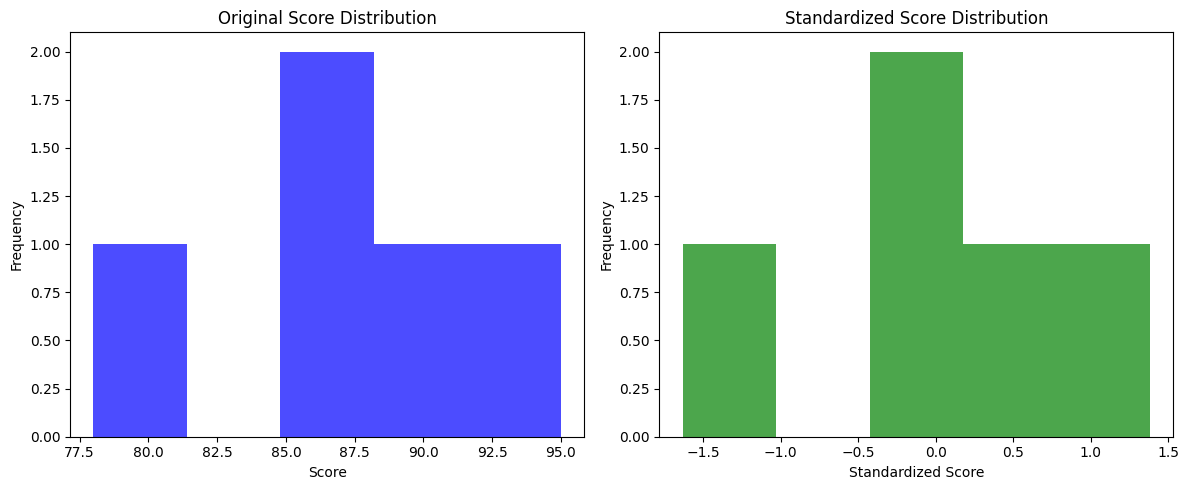

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Sample dataset
data = {
    'ID': [1, 2, 3, 4, 5],
    'Score': [85, 90, 78, 88, 95]
}

df = pd.DataFrame(data)

# Initialize the StandardScaler
standard_scaler = StandardScaler()

# Apply standardization to the 'Score' column
df['Standardized_Score'] = standard_scaler.fit_transform(df[['Score']])

# Plot histograms for original and standardized scores
plt.figure(figsize=(12, 5))

# Histogram for original scores
plt.subplot(1, 2, 1)
plt.hist(df['Score'], bins=5, color='blue', alpha=0.7)
plt.title('Original Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Histogram for standardized scores
plt.subplot(1, 2, 2)
plt.hist(df['Standardized_Score'], bins=5, color='green', alpha=0.7)
plt.title('Standardized Score Distribution')
plt.xlabel('Standardized Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [43]:
# 5. Feature Engineering: Creating new features from existing ones to improve model accuracy.
# Task 1: Create a new synthetic feature from existing dataset features.
# Task 2: Evaluate the impact of new features on model accuracy.
# Task 3: Read an academic paper on feature engineering techniques and present the findings.




In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Sample dataset with a target variable
data = {
    'ID': [1, 2, 3, 4, 5],
    'Height_cm': [170, 180, 160, 175, 165],
    'Weight_kg': [65, 80, 50, 70, 55],
    'Target': [22, 25, 18, 24, 20]  # Example target variable
}

df = pd.DataFrame(data)

# Create a new synthetic feature: BMI
df['BMI'] = df['Weight_kg'] / (df['Height_cm'] / 100) ** 2

# Split the data into training and testing sets
X = df[['Height_cm', 'Weight_kg']]
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model without the new feature
model_without_bmi = LinearRegression()
model_without_bmi.fit(X_train, y_train)
y_pred_without_bmi = model_without_bmi.predict(X_test)
mse_without_bmi = mean_squared_error(y_test, y_pred_without_bmi)

# Now include the new feature (BMI)
X_with_bmi = df[['Height_cm', 'Weight_kg', 'BMI']]
X_train_with_bmi, X_test_with_bmi, y_train, y_test = train_test_split(X_with_bmi, y, test_size=0.2, random_state=42)

# Train a linear regression model with the new feature
model_with_bmi = LinearRegression()
model_with_bmi.fit(X_train_with_bmi, y_train)
y_pred_with_bmi = model_with_bmi.predict(X_test_with_bmi)
mse_with_bmi = mean_squared_error(y_test, y_pred_with_bmi)

print(f"Mean Squared Error without BMI: {mse_without_bmi:.2f}")
print(f"Mean Squared Error with BMI: {mse_with_bmi:.2f}")


Mean Squared Error without BMI: 1.00
Mean Squared Error with BMI: 1.00
